In [46]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Sep 12 15:38:34 2017

@author: DNN - CMPE 297
"""

import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


X, y = sklearn.datasets.make_moons(100, noise=0.20)
y = y.reshape(len(y),1)
#print (y)
#plot the dataset - this is a complete preprocessed(cleaned, normalized, duplicates removed)
plt.figure(1)
#plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

#Splitting into training and testing set
data_train, data_test, labels_train, labels_test = train_test_split(X, y, test_size=0.20, random_state=42)

from math import exp

print("training set ", data_train.shape)
#Sigmoid Activation Function
def sigmoid_activation_function (x):
    return 1/(1 + np.exp(-x))
#Derivative of Sigmoid Function - to calculate the slope
def derivatives_sigmoid(x):
    return x * (1 - x)

# Transfer neuron activation
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))


#Setting the number of epochs aka training iterations
epoch=5000
#Setting learning rate i.e. how much the weight should be changed to correct the error each time
lr=0.01
#number of features in data set
inputlayer_neurons = X.shape[1]
print("Number of features in the dataset: ", inputlayer_neurons)
 #number of hidden layers neurons
hiddenL_neurons = 3
#number of neurons at output layer
output_neurons = 1

#weight and bias initialization using random function in numpy
wh=np.random.uniform(size=(inputlayer_neurons,hiddenL_neurons))
#print("random weight:",wh)
#print("input x:",data_train)
bh=np.random.uniform(size=(1,hiddenL_neurons))
wout=np.random.uniform(size=(hiddenL_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))
#print ("bias at hidden layer: ", bh)
#print ("wout: ", wout)

i=0

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		predict=0
		if predicted[i]>0.5:
			predict=1
		if actual[i] == predict:
			correct += 1
	return correct / float(len(actual)) * 100.0

scores=[]
for i in range(epoch):
    #-----------#-----------#-----------#-----------#-----------#-----------
    #Forward Propagation
    #-----------#-----------#-----------#-----------#-----------#-----------



	l1 = sigmoid_activation_function(np.dot(data_train, wh) + bh)
	l2 = sigmoid_activation_function(np.dot(l1, wout) + bout)
    
    #-----------#-----------#-----------#-----------#-----------#-----------
    #output 
	error = labels_train - l2

	accuracy = accuracy_metric(labels_train, error)
	scores.append(accuracy)

    #-----------#-----------#-----------#-----------#-----------#-----------

    #Backpropagation
	output_lslope = derivatives_sigmoid(l2)
	hidden_lslope = derivatives_sigmoid(l1)
	d_output = error * output_lslope
	error_hlayer = d_output.dot(wout.transpose())

	# Compute​ ​change​ ​factor​ ​(delta)
	d_hlayer = error_hlayer * hidden_lslope
	# Update​ ​the​ ​weights​ ​in​ ​the​ ​network​ ​from​ ​the​ ​errors​ ​calculated
	wout = wout + l1.transpose().dot(d_output) * lr
	wh = wh + np.array(data_train).reshape(-1, 80).dot(d_hlayer) * lr

	# In​ ​the​ ​same​ ​way​ ​update​ ​the​ ​bias
	bout = bout + sum(d_output) * lr
	bh = bh + sum(d_hlayer) * lr

#print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))


('training set ', (80, 2))
('Number of features in the dataset: ', 2)
Mean Accuracy: 72.597%


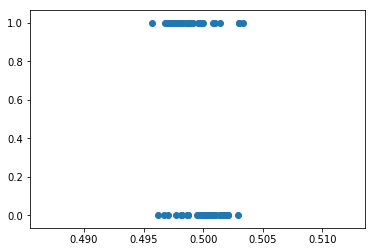

In [47]:
#-----------#-----------#-----------#-----------

plt.scatter(l2,labels_train);
plt.show()

('accuracy', 60.0)


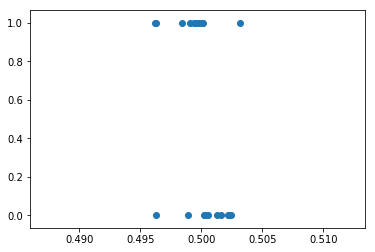

In [48]:
intermediatep= sigmoid_activation_function(np.dot(data_test, wh) + bh)
predictions = sigmoid_activation_function(np.dot(intermediatep, wout) + bout)
error_p = labels_train - l2
accuracy = accuracy_metric(labels_test, error_p)
plt.scatter(predictions, labels_test);

print("accuracy",accuracy)
plt.show()